In [45]:
!conda install -c https://conda.anaconda.org/plotly plotly

/bin/sh: conda: command not found


In [42]:

import plotly
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



ModuleNotFoundError: No module named 'plotly'

In [38]:
#dataframe for RateBeer categories
df = pd.read_csv('ucsd-sansdescrip03162018.csv', sep="|")

In [19]:
#which specific styles are trendiest?

df_styles = df.sort_values(by=['BeerStyleName', 'Entered'])
df_styles

,BeerName,BeerStyleName,Entered,RateCount,BrewerCity,Abbrev,BrewerZIPCode
5814,Barrel House Belgian Winter Ale,Abbey Dubbel,2000-05-28 20:31:40.000,48.0,Cincinnati,OH,45221
5025,New Belgium Abbey Dubbel,Abbey Dubbel,2000-06-07 23:06:21.000,1216.0,Fort Collins,CO,80524
7168,Weyerbacher Belgian Dubbel,Abbey Dubbel,2000-06-13 10:56:07.000,21.0,Easton,PA,18042
5522,Ommegang Abbey Ale,Abbey Dubbel,2000-07-10 15:19:05.000,2213.0,Cooperstown,NY,13326
8843,Allagash Dubbel Reserve,Abbey Dubbel,2000-08-17 01:13:22.000,1080.0,Portland,ME,04103
3393,Flying Fish Abbey Dubbel,Abbey Dubbel,2000-10-02 11:31:56.000,479.0,Somerdale,NJ,08083
9019,Brooklyn Abbey Ale,Abbey Dubbel,2000-11-14 14:05:24.000,49.0,Brooklyn,NY,11211
5832,Empire Belgian Dubbel,Abbey Dubbel,2000-12-10 19:41:05.000,4.0,Syracuse,NY,13202
19235,Kross Double Kross Brown Ale,Abbey Dubbel,2001-01-02 22:09:30.000,27.0,Morrisville,VT,05661
6575,Stoudts Abbey Double,Abbey Dubbel,2001-03-04 15:24:13.000,141.0,Adamstown,PA,19501


In [22]:
#function: given timestamp entered, return year
def standardize_year(timestamp):
    string = "" + str(timestamp)
    return string[:4]

#print(standardize_year(200032344))
df_styles["Entered"] = df_styles["Entered"].apply(standardize_year)
df_styles
cellValue = df_styles.loc[(df_styles['Entered'] == '2000') & (df_styles['BeerStyleName'] == 'Abbey Dubbel')].size
print(cellValue)

56


In [25]:
#get top 10 beers
top_10 = df_styles.BeerStyleName.value_counts().head(10)

# set columns to top ten beers
# set index to years
Columns = []
Index = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

# add each top ten beer to Columns
for style in top_10.index:
    Columns.append(style)

#Create new df with index and columns
df_final = pd.DataFrame(index = Index, columns=Columns)


# populate how many times a beer was added for a given year (top ten beers)
for row in df_final.itertuples():
    for column in Columns:
        string = "" + str(row.Index)
        cellValue = df_styles.loc[(df_styles['Entered'] == string) & (df_styles['BeerStyleName'] == column)].size
        df_final.set_value(index = row.Index, col=column, value=cellValue)              


In [26]:
df_final

,India Pale Ale &#40;IPA&#41;,American Pale Ale,Imperial IPA,Saison,Sour/Wild Ale,Imperial Stout,Porter,Stout,Spice/Herb/Vegetable,Brown Ale
2000,945,1393,21,35,7,182,1176,595,315,994
2001,763,889,91,42,7,189,672,350,329,518
2002,1792,1659,175,112,35,385,1379,903,609,1407
2003,1659,1582,280,224,56,602,1414,868,693,1211
2004,1981,1701,707,168,77,749,1491,847,889,1190
2005,1946,1512,924,448,119,658,1323,812,1036,1113
2006,2268,1379,980,700,175,749,1295,840,1015,1162
2007,2583,1631,1246,518,336,826,1281,910,1092,1211
2008,2639,1855,945,882,756,1043,1519,966,1379,1428
2009,4151,2968,1939,1330,1316,1484,1960,1638,1806,1610


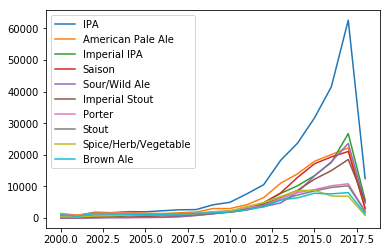

In [56]:
#graph
x = Index

plt.plot(Index, df_final['India Pale Ale &#40;IPA&#41;'])
plt.plot(Index, df_final['American Pale Ale'])
plt.plot(Index, df_final['Imperial IPA'])
plt.plot(Index, df_final['Saison'])
plt.plot(Index, df_final['Sour/Wild Ale'])
plt.plot(Index, df_final['Imperial Stout'])
plt.plot(Index, df_final['Porter'])
plt.plot(Index, df_final['Stout'])
plt.plot(Index, df_final['Spice/Herb/Vegetable'])
plt.plot(Index, df_final['Brown Ale'])
plt.legend(['IPA', 'American Pale Ale', 'Imperial IPA', 'Saison', 'Sour/Wild Ale', 'Imperial Stout', 'Porter', 'Stout', 'Spice/Herb/Vegetable', 'Brown Ale'], loc='upper left')

plt.show()